# Derivation of the Crank–Nicolson Method

This notebook cell outlines a step-by-step derivation of the Crank–Nicolson scheme for the 1D heat equation:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, 
\quad 0 < x < L, \quad t > 0.
$$

---

## 1. The Heat Equation

We consider the one-dimensional heat (diffusion) equation on \([0, L]\). We partition the spatial domain into \(N\) intervals of width \(\Delta x = \tfrac{L}{N}\), so 
$$
x_i = i\,\Delta x, \quad i = 0,1,\dots,N.
$$
We partition the time domain into steps of size \(\Delta t\), so 
$$
t^n = n\,\Delta t, \quad n = 0,1,2,\dots.
$$
We denote
$$
u_i^n \approx u(x_i, t^n).
$$

---

## 2. Discretize the Time Derivative

Approximate the time derivative by a forward difference:

$$
\frac{\partial u}{\partial t}(x_i, t^n) \;\approx\; \frac{u_i^{n+1} - u_i^n}{\Delta t}.
$$

---

## 3. Discretize the Space Derivative

Approximate the second spatial derivative by a central difference:

$$
\frac{\partial^2 u}{\partial x^2}(x_i, t^n) 
\;\approx\;
\frac{u_{i+1}^n - 2\,u_i^n + u_{i-1}^n}{(\Delta x)^2}.
$$

---

## 4. Crank–Nicolson: Averaging Explicit and Implicit

Crank–Nicolson is formed by **averaging** the spatial derivatives at time \(n\) (explicit) and \(n+1\) (implicit). So,

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t}
=
\frac{\alpha}{2}
\Bigl[
  \frac{u_{i+1}^n - 2 u_i^n + u_{i-1}^n}{(\Delta x)^2}
  \;+\;
  \frac{u_{i+1}^{n+1} - 2 u_i^{n+1} + u_{i-1}^{n+1}}{(\Delta x)^2}
\Bigr].
$$

---

## 5. Introduce the Mesh Ratio

Define the mesh ratio

$$
r \;=\; \frac{\alpha \,\Delta t}{(\Delta x)^2}.
$$

Multiply both sides of the Crank–Nicolson equation by \(\Delta t\) and collect like terms:

$$
u_i^{n+1} - u_i^n
=
\frac{r}{2}
\Bigl[
  (u_{i+1}^n - 2\,u_i^n + u_{i-1}^n)
  +
  (u_{i+1}^{n+1} - 2\,u_i^{n+1} + u_{i-1}^{n+1})
\Bigr].
$$

After rearranging, we get:

$$
-\frac{r}{2}\,u_{i-1}^{n+1} 
\;+\;
\bigl(1 + r\bigr)\,u_i^{n+1}
\;-\;
\frac{r}{2}\,u_{i+1}^{n+1}
=
\frac{r}{2}\,u_{i-1}^n
\;+\;
\bigl(1 - r\bigr)\,u_i^n
\;+\;
\frac{r}{2}\,u_{i+1}^n.
$$

---

## 6. Tridiagonal System Form

For \(i = 1, 2, \ldots, N-1\), this defines a **tridiagonal linear system** in the unknowns \(\{u_i^{n+1}\}\). Denote the left-hand side as \(A \mathbf{u}^{n+1}\) and the right-hand side as \(B \mathbf{u}^n\). We can solve it at each time step using the **Thomas algorithm**:

$$
A\,\mathbf{u}^{n+1} = B\,\mathbf{u}^{n}.
$$

---

## 7. Final Scheme

Hence, the Crank–Nicolson scheme for the 1D heat equation is:

$$
-\frac{r}{2}\,u_{i-1}^{n+1}
\;+\;
(1 + r)\,u_i^{n+1}
\;-\;
\frac{r}{2}\,u_{i+1}^{n+1}
\;=\;
\frac{r}{2}\,u_{i-1}^n
\;+\;
(1 - r)\,u_i^n
\;+\;
\frac{r}{2}\,u_{i+1}^n,
$$
subject to your chosen boundary conditions (Dirichlet, Neumann, etc.) at \(i = 0\) and \(i = N\).

## Matrix Form

We can write this entire system for \(i = 1, 2, \dots, N-1\) in **matrix form** as:

$$
A \,\mathbf{u}^{n+1}
\;=\;
B \,\mathbf{u}^{n},
$$

where 
$\mathbf{u}^n$ is the vector 
$\bigl[u_1^n,\; u_2^n,\;\dots,\;u_{N-1}^n\bigr]^T$,  
and \(A\) and \(B\) are **tridiagonal** matrices of size $(N-1)\times(N-1)$.

### The Matrix \(A\)

$$
A = 
\begin{bmatrix}
1 + r & -\tfrac{r}{2} & 0 & \cdots & 0 \\
-\tfrac{r}{2} & 1 + r & -\tfrac{r}{2} & \ddots & \vdots \\
0 & -\tfrac{r}{2} & 1 + r & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -\tfrac{r}{2} \\
0 & \cdots & 0 & -\tfrac{r}{2} & 1 + r
\end{bmatrix}.
$$

### The Matrix \(B\)

$$
B = 
\begin{bmatrix}
1 - r & \tfrac{r}{2} & 0 & \cdots & 0 \\
\tfrac{r}{2} & 1 - r & \tfrac{r}{2} & \ddots & \vdots \\
0 & \tfrac{r}{2} & 1 - r & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \tfrac{r}{2} \\
0 & \cdots & 0 & \tfrac{r}{2} & 1 - r
\end{bmatrix}.
$$

Hence, the **Crank–Nicolson update** for each time step is:

$$
\mathbf{u}^{n+1} = A^{-1} B \,\mathbf{u}^{n},
$$

though in practice we do **not** invert \(A\) directly; rather, we solve the linear system 
$$
A \,\mathbf{u}^{n+1} = B \,\mathbf{u}^{n}
$$
efficiently using the **Thomas algorithm** (a specialized \(O(N)\) Gaussian elimination for tridiagonal matrices).

---


**Key points:**
- This is **second-order accurate** in both time and space.
- **Unconditionally stable** for linear diffusion problems.
- Solved via a tridiagonal linear system at each timestep.


# Thomas Algorithm: Step-by-Step Derivation

We want to solve a **tridiagonal linear system** of \\( n \\) equations:

$$
\begin{aligned}
b_1\,x_1 \;+\; c_1\,x_2 &= d_1, \\[6pt]
a_2\,x_1 \;+\; b_2\,x_2 \;+\; c_2\,x_3 &= d_2, \\[4pt]
a_3\,x_2 \;+\; b_3\,x_3 \;+\; c_3\,x_4 &= d_3, \\[-2pt]
&\;\;\;\;\vdots \\[-4pt]
a_n\,x_{n-1} \;+\; b_n\,x_n &= d_n.
\end{aligned}
$$

Here:
- \\( a_i \\) are the subdiagonal entries (\\( i = 2,\dots,n \\); often we take \\(a_1 = 0\\) by convention),
- \\( b_i \\) are the main diagonal entries (\\( i = 1,\dots,n \\)),
- \\( c_i \\) are the superdiagonal entries (\\( i = 1,\dots,n-1 \\); often \\(c_n=0\\) by convention),
- \\( d_i \\) are the constants on the right-hand side.

Our goal is to find \\( x_1, x_2,\dots,x_n \\) in \\( \mathcal{O}(n) \\) time. The procedure involves two phases:

1. **Forward Elimination** – to remove the subdiagonal \\( a_i \\).
2. **Back Substitution** – to solve the resulting upper-triangular system.

---

## 1. Forward Elimination

We sequentially eliminate \\( a_2, a_3, \dots, a_n \\) by modifying each row in turn. 

### Step 1 (Row 1)

The first equation is

$$
b_1 \, x_1 \;+\; c_1 \, x_2 \;=\; d_1.
$$

We **normalize** this row by dividing through by \\( b_1 \\) (assuming \\( b_1 \neq 0 \\)):

$$
x_1 \;+\; \frac{c_1}{b_1}\,x_2 \;=\; \frac{d_1}{b_1}.
$$

Define the **modified** superdiagonal and right-hand side for row 1:

$$
c'_1 \;=\; \frac{c_1}{b_1}, 
\quad
d'_1 \;=\; \frac{d_1}{b_1}.
$$

Hence the first row (in **modified** form) is:

$$
x_1 \;+\; c'_1 \, x_2 \;=\; d'_1.
$$

### Step 2 (Row 2)

The second equation in the original system is

$$
a_2\,x_1 \;+\; b_2\,x_2 \;+\; c_2\,x_3 \;=\; d_2.
$$

We want to **eliminate** \\( x_1 \\) from this equation using the (already normalized) Row 1.

1. Multiply the (modified) Row 1 by \\( a_2 \\) and **subtract** from Row 2:

   $$
   a_2 \Bigl(x_1 + c'_1\,x_2\Bigr) = a_2\,d'_1.
   $$

   Subtracting, we get:

   $$
   (b_2 - a_2\,c'_1)\,x_2 \;+\; c_2\,x_3 
   \;=\;
   d_2 - a_2\,d'_1.
   $$

2. Define

   $$
   \begin{aligned}
   b_2' &\;=\; b_2 \;-\; a_2 \, c'_1, \\
   d_2' &\;=\; d_2 \;-\; a_2 \, d'_1.
   \end{aligned}
   $$

   So the second equation becomes

   $$
   b_2'\,x_2 \;+\; c_2\,x_3 \;=\; d_2'.
   $$

3. **Normalize** this row by dividing through by \\( b_2' \\):

   $$
   x_2 \;+\; \frac{c_2}{b_2'}\,x_3 
   \;=\;
   \frac{d_2'}{b_2'}.
   $$

   Define:

   $$
   c'_2 = \frac{c_2}{b_2'},
   \quad
   d'_2 = \frac{d_2'}{b_2'}.
   $$

Hence Row 2 is now:

$$
x_2 \;+\; c'_2\,x_3 = d'_2.
$$

### Step 3 (General Row \\( i \\))

For \\( i = 3,4,\dots,n \\), we proceed **similarly**:

1. The \\( i \\)-th equation (before modification) is

   $$
   a_i\,x_{i-1} \;+\; b_i\,x_i \;+\; c_i\,x_{i+1} = d_i.
   $$

2. We have already normalized Row \\( i-1 \\), so we can subtract \\( a_i \\) times that row to eliminate \\( x_{i-1} \\). Symbolically:

   $$
   b_i' \;=\; b_i \;-\; a_i \, c'_{\,i-1},
   \quad
   d_i' \;=\; d_i \;-\; a_i \, d'_{\,i-1}.
   $$

3. **Normalize** Row \\( i \\) by dividing through by \\( b_i' \\):

   $$
   c'_i \;=\; \frac{c_i}{b_i'},
   \quad
   d'_i \;=\; \frac{d_i'}{b_i'}.
   $$

After processing row \\( n \\), the subdiagonal entries are effectively **eliminated**. The system is now **upper-triangular**, represented by:

$$
x_i + c'_i \, x_{i+1} = d'_i, 
\quad (i = 1,2,\dots,n-1).
$$

For the last equation (\\( i = n \\)), it simply becomes:

$$
x_n = d'_n.
$$

---

## 2. Back Substitution

Now we solve for the \\( x_i \\) **from the bottom up**:

1. **Initialize** the solution at the last row:

   $$
   x_n = d'_n.
   $$

2. **For** \\( i = n-1, n-2,\dots,1 \\):

   $$
   x_i 
   \;=\; 
   d'_i - c'_i \,x_{i+1}.
   $$

This recovers all the unknowns \\( x_1,\dots,x_n \\) in a single **backward** pass.

---

## 3. Summary of the Thomas Algorithm

- **Forward Elimination**:  
  For \\( i = 1 \\) to \\( n \\):
  1. Normalize the current row by its diagonal (\\( b_i' \\)).
  2. Use the normalized row to eliminate \\( a_{i+1} \\) in the next row.

- **Back Substitution**:  
  Start from \\( x_n = d'_n \\) and move backward using
  \\( x_i = d'_i - c'_i\,x_{i+1} \\).

### Complexity

Because each step uses only a few arithmetic operations per row, the **Thomas algorithm** runs in \\( \mathcal{O}(n) \\) time, much faster than \\( \mathcal{O}(n^3) \\) for generic Gaussian elimination.

---

## 4. Final Formulas

Putting it all together, if we define:

$$
\begin{aligned}
\text{(Initialization)} \quad & c'_1 = \frac{c_1}{b_1}, 
& d'_1 = \frac{d_1}{b_1}, \\[6pt]
\text{(Forward sweep for } i=2,\dots,n) \quad &
b_i' = b_i - a_i \, c'_{\,i-1}, \quad
& d_i' = d_i - a_i \, d'_{\,i-1},\\
& c'_i = \frac{c_i}{b_i'}, \quad
& d'_i = \frac{d_i'}{b_i'}, \\[6pt]
\text{(Back Substitution)} \quad &
x_n = d'_n, \quad
& x_i = d'_i - c'_i \, x_{i+1} \quad \bigl(i=n-1,\dots,1\bigr),
\end{aligned}
$$

then \\( \{x_i\} \\) is the unique solution of the original **tridiagonal system**.

**That** is the Thomas algorithm in a **step-by-step** derivation, showing how we systematically eliminate subdiagonal terms and then back-substitute.

---


In [11]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
import numpy as np

def solve_by_thomas_algorithm(a, b, c, d):
    """
    Solve a tridiagonal system A x = d using the Thomas algorithm.
    a, b, c: lower, main, and upper diagonals (1D arrays).
    d: right-hand side array.
    Returns the solution array x.
    """
    N = len(b)
    cp = np.zeros(N)
    dp = np.zeros(N)
    xs = np.zeros(N)

    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]

    for i in range(1, N):
        bp = b[i] - a[i] * cp[i - 1]
        cp[i] = c[i] / bp
        dp[i] = (d[i] - a[i] * dp[i - 1]) / bp

    xs[-1] = dp[-1]
    for i in range(N - 2, -1, -1):
        xs[i] = dp[i] - cp[i] * xs[i + 1]

    return xs


def solve_heat_equation(params):
    """
    Solve the 1D heat equation using the Crank–Nicolson method with Thomas algorithm.

    Parameters:
      params = (α, L, Nx, Nt, Δt, u_boundary, u_ini, r)

    Returns:
      ts        -> 1D array of time values
      solutions -> 2D array of shape (Nx, Nt+1)
    """
    α, L, Nx, Nt, dt, u_boundary, u_ini, r = params
    u = np.copy(u_ini)
    ts = np.linspace(0.0, Nt * dt, Nt + 1)
    solutions = np.zeros((Nx, Nt + 1))

    for t in range(Nt+1):
        solutions[:, t] = u.copy()

        d = np.zeros(Nx)
        for i in range(Nx):
            d[i] = (1 - r) * u[i]
            if i > 0:
                d[i] += 0.5 * r * u[i - 1]
            if i < Nx - 1:
                d[i] += 0.5 * r * u[i + 1]

        # Adjust Boundary conditions
        d[0] += r * u_boundary[0]
        d[-1] += r * u_boundary[1]

        # Tridiagonal matrix coefficients
        a = np.zeros(Nx)
        b = (1 + r) * np.ones(Nx)
        c = np.zeros(Nx)

        a[1:] = -0.5 * r
        c[:-1] = -0.5 * r

        u = solve_by_thomas_algorithm(a, b, c, d)

        # Fix boundary values
        u[0], u[-1] = u_boundary

    solutions[:, -1] = u
    return ts, solutions


Trial run time: 0.0042498111724853516 s
Final run time: 0.9712798595428467 s


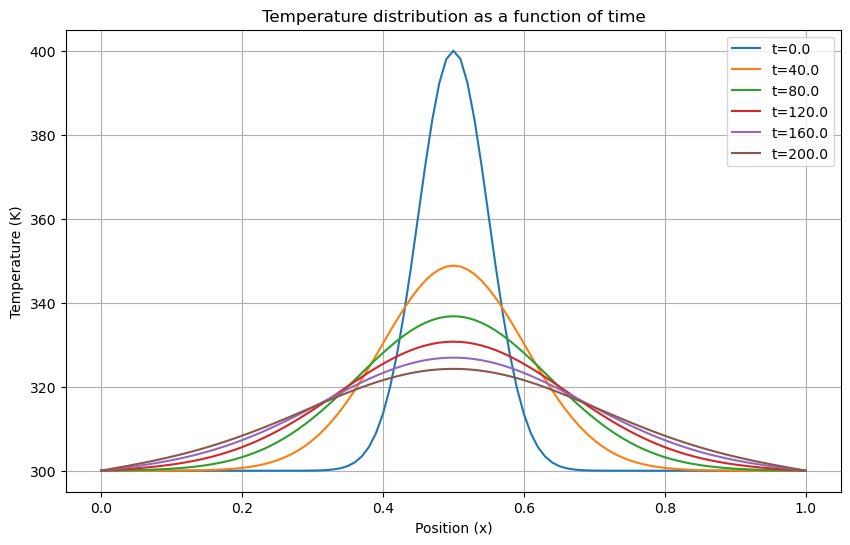

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
α = 1.0e-4
L = 1.0
Nx = 101
Nt = 2000
dt = 0.1
σ = 0.05
u_boundary = (300.0, 300.0)

dx = L / (Nx - 1)
r = α * dt / (dx * dx)

xs = np.linspace(0.0, L, Nx)

# Initial condition: Gaussian bump over 300 K
u_ini = 300 + 100 * np.exp(-((xs - L / 2) ** 2) / (2 * σ ** 2))

# Trial parameters (2 steps)
params = (α, L, Nx, 2, dt, u_boundary, u_ini, r)
start = time.time()
ts, solutions = solve_heat_equation(params)
print("Trial run time:", time.time() - start, "s")

# Full simulation
params = (α, L, Nx, Nt, dt, u_boundary, u_ini, r)
start = time.time()
ts, solutions = solve_heat_equation(params)
print("Final run time:", time.time() - start, "s")

# Plot (sample every 400 steps)
plt.figure(figsize=(10, 6))
sample_step = 400
for k in range(0, Nt + 1, sample_step):
    plt.plot(xs, solutions[:, k], label=f"t={ts[k]:.1f}")

plt.legend()
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.show()


In [29]:
Nx = 11
Nt = 10

In [27]:
solutions = np.zeros((Nx, Nt + 1))
u_ini = [1,2,3,4,5,6,7,8,9,10,11]
u = np.copy(u_ini)
for t in range(Nt):
        solutions[:, t] = u.copy()

solutions


array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  0.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  0.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  0.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  0.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  0.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  0.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  0.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  0.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,  0.]])

In [23]:
ts = np.linspace(0,10,5)
ts

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [2]:
1e-4
10e-4


0.001

0.0001